### Importing Libraries

In [44]:
import tweepy 
import simplejson as json
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pickle
import plotly
plotly.tools.set_credentials_file(username='tpjoe', api_key='E2F2YSfjWPT27ppd3bIn')
plotly.tools.set_config_file(world_readable=True,
                             sharing='public')
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import random
from IPython.display import Markdown, display
from os import path
import re
import sys
import io
import nltk
nltk.download('wordnet')
nltk.download('nps_chat')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('treebank')
nltk.download('brown')

d =  'D:\Google_Drive\Machine_Learning\CSE847_Machine_learning\GroupProject'

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [2]:
def load_api():
    ''' Function that loads the twitter API after authorizing
        the user. '''
    # Consumer keys and access tokens, used for OAuth
    consumer_key = 'GVa2mTqsbKBn22gULauYfaq43'
    consumer_secret = 'C755Qe7UP8HlZGNAm6AzIgiqA2tagnL9VXuHIyGYQZcdZnaBZk'
    access_token = '963531380016730114-FcdhPbtxqoAk68JIz53KD7MKObp6kvt'
    access_token_secret = 'mqGhAX2dVygT555Aq4iJgXeEagjk1Ob12suhBONjUK1hc'
    # OAuth process, using the keys and tokens
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    # load the twitter API via tweepy
    return tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=False)

def load_tweet_tid(tid):
    ''' Function that loads the twitter status using TweetID. '''
    tweet = api.get_status(tid, tweet_mode = 'extended')
    return tweet._json

def get_retweets(tid, N):
    ''' Function that loads N retweets of a particular TweetID. It returns tweet statuses[0-N]. To get the json,
    do, for example, retweets[0]._json'''
    retweets = api.retweets(tid, [count])
    return retweets

def get_CCDF(DataFrame):
    ''' Function that returns the complementary cumulative distribution function'''
    return

def two_param_boxcox(data):
    data += 1
    data, _ = stats.boxcox(data)
    return data

def outlier_by_zscore(DataFrame, zscore_max = 3):
    ix = []
    for col in DataFrame:
        ix.extend(DataFrame.index[DataFrame[col].where(np.abs(stats.zscore(DataFrame[col])) < 3).isnull() == True])
    return list(set(ix))

def printmd(string):
    display(Markdown(string))

# Data Acquisition

In [4]:
# import labeled source data file and organize labels into DataFrame

source_and_labels = pd.read_csv(path.join(d, 'Twitter.txt'), sep='\t', header = None)

source_and_labels.columns = ['topics_id', 'label', 'tweet_id'] #label 1: Fake news
source_and_labels['label'] = source_and_labels['label'].map(lambda x: x.lstrip('label:'))
source_and_labels['tweet_id'] = source_and_labels['tweet_id'].map(lambda x: x.split())

formatted_source_and_labels = {'topics_id':[], 'label':[], 'tweet_id':[]}

for i, topic in enumerate(source_and_labels['tweet_id']):
    for tid in topic:
        formatted_source_and_labels['topics_id'].append(source_and_labels['topics_id'][i])
        formatted_source_and_labels['label'].append(source_and_labels['label'][i])
        formatted_source_and_labels['tweet_id'].append(tid)
        
data_raw = pd.DataFrame(formatted_source_and_labels)
data_raw = data_raw[['topics_id', 'label', 'tweet_id']]

data_raw.head(5)

,topics_id,label,tweet_id
0,eid:E17,0,677641866930757635
1,eid:E17,0,677644704100544513
2,eid:E17,0,677653639389962241
3,eid:E17,0,677664025346449409
4,eid:E17,0,677682035838861313


In [195]:
# API data from twitters and pickling
api = load_api()
data = {'text': [], 'coordinates': [], 'post_date': [], 'retweet_count': [], 'favorite_count': [], 'language': [], \
        'friends_count': [], 'followers_count': [], 'location': [], 'place': [], 'following': [], 'utc_offset': [], \
        'description': [], 'statuses_count': [], 'time_zone': [], 'verified': [], 'profile_image_url_https': [], \
        'name': [], 'account_date': [], 'user_id': []}

retweet_time = []
retweet_id = []
error_id = []

for i, tid in enumerate(data_raw['tweet_id'][0:900]):
    try:
        tweet = load_tweet_tid(tid)
        data['text'].append(tweet['full_text'])
        data['coordinates'].append(tweet['coordinates'])
        data['post_date'].append(tweet['created_at'])
        data['retweet_count'].append(tweet['retweet_count'])
        data['favorite_count'].append(tweet['favorite_count'])
        data['language'].append(tweet['lang'])
        data['friends_count'].append(tweet['user']['friends_count'])
        data['followers_count'].append(tweet['user']['followers_count'])
        data['following'].append(tweet['user']['following'])
        data['location'].append(tweet['user']['location'])
        data['place'].append(tweet['place'])
        data['utc_offset'].append(tweet['user']['utc_offset'])
        data['description'].append(tweet['user']['description'])
        data['time_zone'].append(tweet['user']['time_zone'])
        data['statuses_count'].append(tweet['user']['statuses_count'])
        data['verified'].append(tweet['user']['verified'])
        data['profile_image_url_https'].append(tweet['user']['profile_image_url_https'])
        data['name'].append(tweet['user']['name'])
        data['account_date'].append(tweet['user']['created_at'])
        data['user_id'].append(tweet['user']['id'])
        
        if 'retweeted_status' in tweet:
            retweet_id.append(tid)
            retweet_time.append(tweet['retweeted_status']['created_at'])
        
    except:
        error_id.append(tid)
    if i%450 == 0:
        print('Currently at {} tweets'.format(i))

data_test = pd.DataFrame(data)
data_raw_test = data_raw[0:901]
data_test.to_pickle(path.join(d, 'data_test'))
data_raw_test.to_pickle(path.join(d, 'data_raw_test'))
pickle.dump(error_id, open(path.join(d, 'error_id.p'), 'wb' ))

Currently at 0 tweets
Currently at 450 tweets


### Savepoint

In [211]:
# Data loading
data_raw_test = data_raw[0:25000]
data_test = pd.read_pickle(path.join(d, 'Data\data_0to25000'))
with open(path.join(d, 'Data\error_0to25000.p'), 'rb') as file:
    error_id = pickle.load(file)

### Creating full dataset with English only tweets

In [213]:
# Get rid of error tweets
error_ix = []
for error in error_id:
    error_ix += (data_raw_test.index[data_raw_test['tweet_id'] == error].tolist())
data_raw_test = data_raw_test.drop(data_raw_test.index[error_ix])

# Take only data that are in English
data_test = data_test[data_test['language']=='en']

# Drop unused coordinates row (for now)
data_test = data_test.drop(['coordinates', 'profile_image_url_https', 'time_zone', 'utc_offset', 'following', \
                           'place', 'verified'], axis=1)
data_raw_test = data_raw_test.drop(['tweet_id'], axis=1)

# Reset index
data_raw_test = data_raw_test.reset_index()

# Join labeled dataframe with API data
data_test = pd.concat([data_raw_test, data_test], axis=1)
data_test = data_test.drop(['index'], axis=1)

# Separate data to true and fake
data_test_true = data_test[data_test.label == '0']
data_test_false = data_test[data_test.label == '1']

# Numeric Data Analysis and Preprocessing

In [214]:
# Check NaN data
numeric_column = ['friends_count', 'followers_count', 'favorite_count', 'statuses_count']
print('Current dataset has a dimension of {}'.format(data_test.shape))

for col in numeric_column:
    NaN_row = data_test[data_test[col].isnull()]
print('There are {} rows with NaNs'.format(len(NaN_row)))
    
# Here we found that only one row has all NaN values, therefore we are going to delete it
data_test = data_test.dropna(axis=0, how='any')
print('The new dataset has a dimension of {}'.format(data_test.shape))
    
# Reset index
data_test = data_test.reset_index()

# Breif look at the numerical data
data_test[['favorite_count', 'followers_count', 'friends_count', 'statuses_count']].describe()

Current dataset has a dimension of (21925, 15)
There are 28 rows with NaNs
The new dataset has a dimension of (21897, 15)


,favorite_count,followers_count,friends_count,statuses_count
count,21897.000000,2.189700e+04,21897.000000,2.189700e+04
mean,0.886103,2.720258e+04,3069.859387,9.438073e+04
std,20.140094,4.420114e+05,12004.734906,1.883583e+05
min,0.000000,0.000000e+00,0.000000,1.000000e+00
25%,0.000000,2.010000e+02,167.000000,8.074000e+03
50%,0.000000,7.230000e+02,730.000000,2.886400e+04
75%,0.000000,2.833000e+03,2083.000000,9.683700e+04
max,2182.000000,1.739649e+07,502593.000000,2.720277e+06


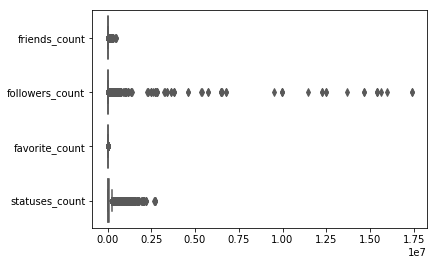

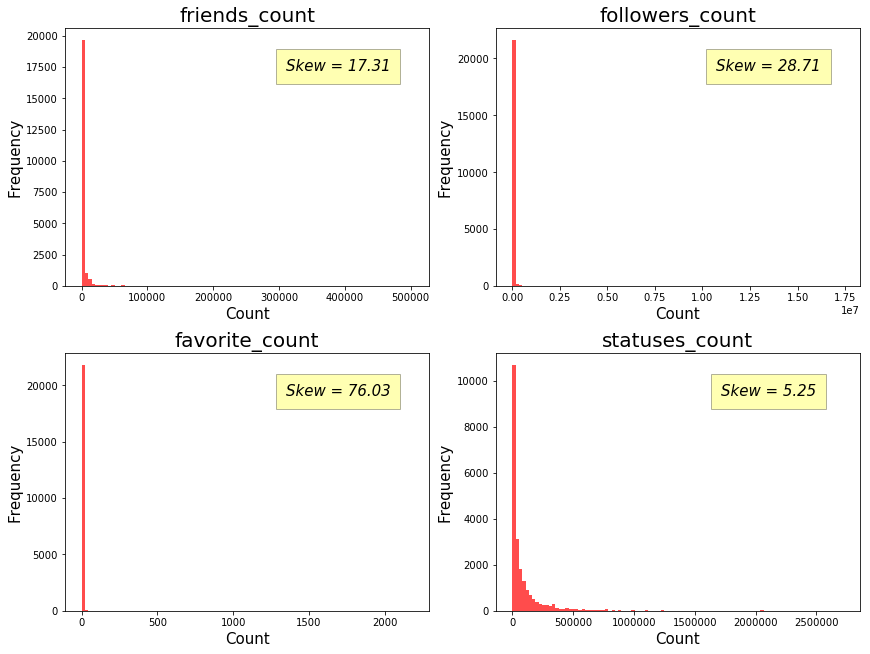

In [417]:
# Investigate the distribution of the numeric data
ax = sns.boxplot(data=data_test[['friends_count', 'followers_count', 'favorite_count', 'statuses_count']], orient="h", palette="Set2")
plt.show()

f, axes = plt.subplots(2,2)
axes = axes.ravel()

for i, ax in enumerate(axes):
    skewness = stats.skew(data_test[numeric_column[i]])
    ax.hist(data_test[numeric_column[i]],  color="red", alpha=0.7, bins=100)
    ax.set_title(numeric_column[i], fontsize = 20)
    ax.set_xlabel('Count', fontsize = 15)
    ax.set_ylabel('Frequency', fontsize = 15)
    ax.text(0.75, 0.85, 'Skew = {0:.2f}'.format(skewness), style='italic', fontsize = 15,horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes,bbox={'facecolor':'yellow', 'alpha':0.3, 'pad':10})

f.set_figheight(9)
f.set_figwidth(12)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

### Transformation and normalization

In [215]:
# Data transformation and normalization using two-param boxcox
for category in ['friends_count', 'followers_count', 'favorite_count', 'statuses_count']:
    data_test.loc[:,(category)] = two_param_boxcox(data_test.loc[:,(category)])
    
# Data normalization
for category in ['friends_count', 'followers_count', 'favorite_count', 'statuses_count']:
    min_max_scaler = MinMaxScaler()
    data_test[[category]] = min_max_scaler.fit_transform(data_test[[category]])

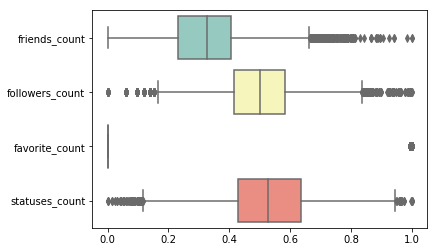

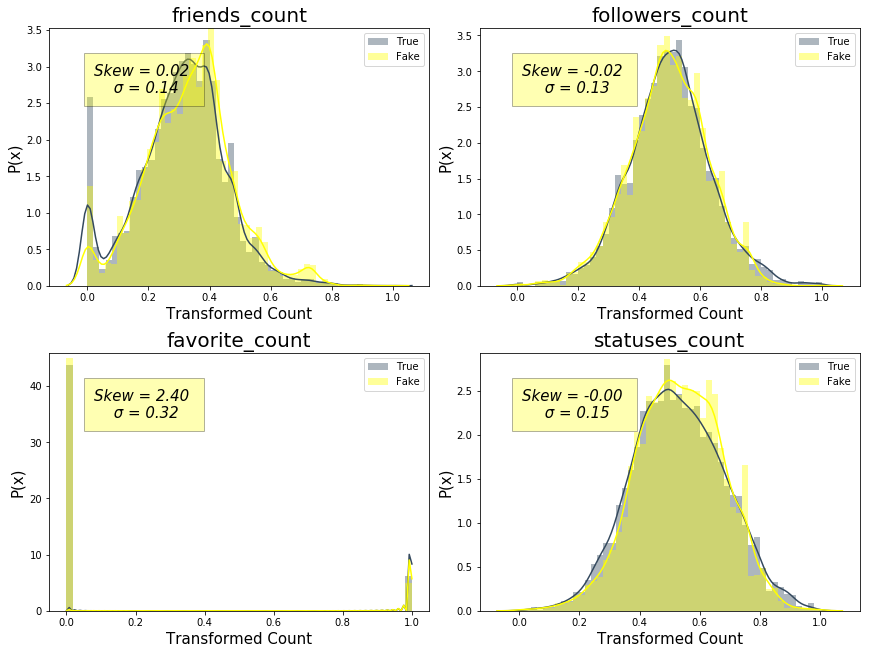

In [419]:
# Re-visit the distribution of the numeric data
ax = sns.boxplot(data=data_test[['friends_count', 'followers_count', 'favorite_count', 'statuses_count']], \
                 orient="h", palette="Set3")
plt.show()

f, axes = plt.subplots(2,2)
axes = axes.ravel()

for i, ax in enumerate(axes):
    skewness = stats.skew(data_test[numeric_column[i]])
    sd = np.std(data_test[numeric_column[i]])
    
    sns.distplot(data_test[numeric_column[i]][data_test['label'] == '0'], color= "#34495e", label="True", ax=ax)
    sns.distplot(data_test[numeric_column[i]][data_test['label'] == '1'] , color="yellow", label="Fake", ax = ax)
    ax.set_title(numeric_column[i], fontsize = 20)
    ax.set_xlabel('Transformed Count', fontsize = 15)
    ax.set_ylabel('P(x)', fontsize = 15)
    ax.text(0.25, 0.8, 'Skew = {0:.2f} \n σ = {1:.2f}'.format(skewness, sd), style='italic', fontsize = 15,horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes,bbox={'facecolor':'yellow', 'alpha':0.3, 'pad':10})
    ax.legend()
    
f.set_figheight(9)
f.set_figwidth(12)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()



### Extreme outliers removal

In [216]:
# Getting the outliers out from the now Gaussian distributed data
outliers_ix = outlier_by_zscore(data_test[['followers_count', 'statuses_count', 'friends_count']])
data_test = data_test.drop(outliers_ix, axis=0)

# Reset index
data_test = data_test.reset_index()

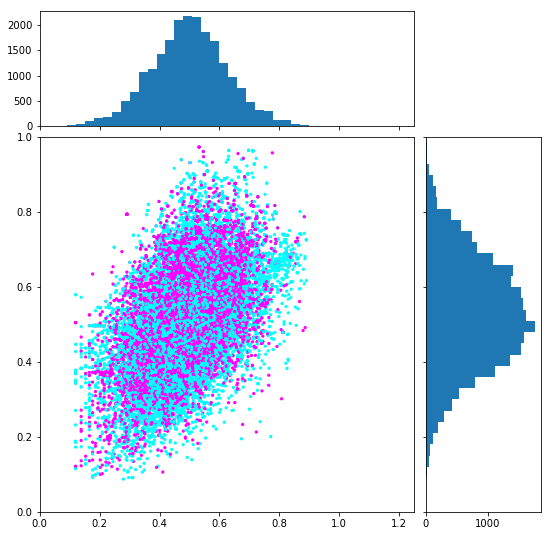

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# the random data
x = data_test['followers_count']
y = data_test['statuses_count']
z = data_test['label']

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plot:
axScatter.scatter(x, y, c=z, s=5, cmap = 'cool')

# now determine nice limits by hand:
binwidth = 0.03
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((0, 1.25))
axScatter.set_ylim((0, 1))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

### Pointbiserial correlations

In [217]:
# Investigate the correlations between numeric variables and the labels
corr, p_value = [0]*len(numeric_column), [0]*len(numeric_column)
for i, column in enumerate(numeric_column):
    corr[i], p_value[i] = stats.pointbiserialr(pd.to_numeric(data_test['label']).values, data_test[column])
    
print('The point biserial correlation and its p-values are')
for col, cor, p in zip(numeric_column, corr, p_value):
    print('{}\t: {}, {}'.format(col, cor, p))

The point biserial correlation and its p-values are
friends_count	: 0.08891665967796239, 2.9966505266487345e-39
followers_count	: -0.00928270180916224, 0.1720408535872894
favorite_count	: -0.033979175845642105, 5.722086161537274e-07
statuses_count	: 0.019833732065939715, 0.0035208992748284452


# Textural Data Analysis

In [218]:
import re
import sys
import io

# input and output files
infile = sys.argv[1]
outfile = sys.argv[2]

regex_str = [
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)+' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)

def tokenize(s):
    return tokens_re.findall(s)

def preprocess(s, lowercase=True):
    tokens = tokenize(s)
    tokens = [token.lower() for token in tokens]

    html_regex = re.compile('<[^>]+>')
    tokens = [token for token in tokens if not html_regex.match(token)]

    mention_regex = re.compile('(?:@[\w_]+)')
    tokens = ['@user' if mention_regex.match(token) else token for token in tokens]

    url_regex = re.compile('http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+')
    tokens = ['!url' if url_regex.match(token) else token for token in tokens]

    hashtag_regex = re.compile("(?:\#+[\w_]+[\w\'_\-]*[\w_]+)")
    tokens = ['' if hashtag_regex.match(token) else token for token in tokens]

    flag = False
    for item in tokens:
        if item=='rt':
            flag = True
            continue
        if flag and item=='@user':
            return ''
        else:
            flag = False

    return ' '.join([t for t in tokens if t]).replace('rt @user : ','')



#with io.open(path.join(d, 'testtest.txt'), 'w') as tweet_processed_text, io.open(path.join(d, 'readmee.txt'), 'r') as fin:
#    for line in fin:
#        tweet_processed_text.write(preprocess(line.rstrip())+'\n')

In [219]:
# Text sample from the twitter text corpus
printmd('**Samples of tweet texts: **')
random_tweets = random.sample(range(0, len(data_test.text)), 5)
for tweet in random_tweets:
    TF = 'True' if data_test.label[tweet] == '0' else 'False'
    print('\n' + '[' + TF + ']' + data_test.text[tweet])

**Samples of tweet texts: **


[True]Saudi Arabia Has 100,000 Air Conditioned Tents That Can House 3 Million People Sitting Empty Yet Has Taken Zero Refugees

[True]Scott Weiland, Former Stone Temple Pilots Singer, Dead at 48 - Billboard https://t.co/WHQpjZI6to

[True]Scott Weiland, Stone Temple Pilots founding lead singer, dead at 48 - https://t.co/HLDl6bXVU2

[True]Rock singer Scott Weiland dead at 48 via the @FoxNews App https://t.co/NbevMiZ0xz

[True]Saudi Arabia Has 100,000 Empty Tents with AC for 3 Million People – They’ve Taken Zero Refugees
https://t.co/YbEeN5cIs6


### Tweets tags and url preprocessing

In [220]:
# Text sample from the twitter corpus after url, hashtags, username removals and no capitalization
data_test['text'] = data_test['text'].map(lambda x: x.rstrip())
data_test['text'] = data_test['text'].apply(preprocess)
printmd('**Samples of tweet texts after preprocessing: **')
for tweet in random_tweets:
    TF = 'True' if data_test.label[tweet] == '0' else 'False'
    print('\n' + '[' + TF + ']' + data_test.text[tweet])

**Samples of tweet texts after preprocessing: **


[True]saudi arabia has 100,000 air conditioned tents that can house 3 million people sitting empty yet has taken zero refugees

[True]scott weiland , former stone temple pilots singer , dead at 48 - billboard !url

[True]scott weiland , stone temple pilots founding lead singer , dead at 48 - !url

[True]rock singer scott weiland dead at 48 via the @user app !url

[True]saudi arabia has 100,000 empty tents with ac for 3 million people – they ’ve taken zero refugees !url


### 1-gram Frequency

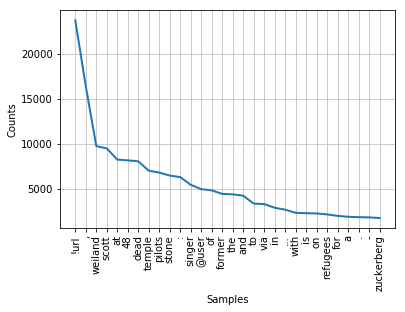

In [221]:
text = data_test.text.tolist()
text = ' '.join(text)

tokens = [t for t in text.split()]
freq = nltk.FreqDist(tokens)
#for key,val in freq.items():
#    print (str(key) + ':' + str(val))
freq.plot(30, cumulative=False)
plt.show()

### Noise Reduction: Removing Stopwords

In [222]:
# Because we want to retain the some level of syntax understanding, and since tweets\
# are already short, we won't remove much stop words.

# Check word list in the NLTK corpus
#set(nltk.corpus.stopwords.words('english'))

stop_words = ['!url', '@user', 'the', 'a', 'an', 'any', 'nor', 'so', 'too']
data_test['text'] = data_test['text'].apply(lambda x:\
                                                      ' '.join([word for word in x.split() if word not in (stop_words)]))

### Tokenization

In [223]:
# Counting input with no text and maybe? removing them
print('The number of tweets removed because there is no text after sentence words \
preprocessing is: {0:.0f}, out of {1:.0f} tweets'.format(len(data_test[data_test.text == '']), len(data_test)))
data_test = data_test[data_test.text != '']

# Text tokenization
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
data_test['words'] = data_test['text'].apply(lambda x: tknzr.tokenize(x))
print('Text has been tokenized in the new column \'words\'')

printmd('**Samples of tweet texts after tokenization: **')
for tweet in random_tweets:
    TF = 'True' if data_test.label[tweet] == '0' else 'False'
    print('\n' + '[' + TF + ']' + '{}'.format(data_test.words[tweet]))

The number of tweets removed because there is no text after sentence words preprocessing is: 122, out of 21646 tweets
Text has been tokenized in the new column 'words'


**Samples of tweet texts after tokenization: **


[True]['saudi', 'arabia', 'has', '100,000', 'air', 'conditioned', 'tents', 'that', 'can', 'house', '3', 'million', 'people', 'sitting', 'empty', 'yet', 'has', 'taken', 'zero', 'refugees']

[True]['scott', 'weiland', ',', 'former', 'stone', 'temple', 'pilots', 'singer', ',', 'dead', 'at', '48', '-', 'billboard']

[True]['scott', 'weiland', ',', 'stone', 'temple', 'pilots', 'founding', 'lead', 'singer', ',', 'dead', 'at', '48', '-']

[True]['rock', 'singer', 'scott', 'weiland', 'dead', 'at', '48', 'via', 'app']

[True]['saudi', 'arabia', 'has', '100,000', 'empty', 'tents', 'with', 'ac', 'for', '3', 'million', 'people', '–', 'they', '’', 've', 'taken', 'zero', 'refugees']


### Text Normalization: Text Lemmatization

In [224]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

data_test['words'] = data_test['words'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

printmd('**Samples of tweet texts after lemmatization: **')
for tweet in random_tweets:
    TF = 'True' if data_test.label[tweet] == '0' else 'False'
    print('\n' + '[' + TF + ']' + '{}'.format(data_test.words[tweet]))

**Samples of tweet texts after lemmatization: **


[True]['saudi', 'arabia', 'ha', '100,000', 'air', 'conditioned', 'tent', 'that', 'can', 'house', '3', 'million', 'people', 'sitting', 'empty', 'yet', 'ha', 'taken', 'zero', 'refugee']

[True]['scott', 'weiland', ',', 'former', 'stone', 'temple', 'pilot', 'singer', ',', 'dead', 'at', '48', '-', 'billboard']

[True]['scott', 'weiland', ',', 'stone', 'temple', 'pilot', 'founding', 'lead', 'singer', ',', 'dead', 'at', '48', '-']

[True]['rock', 'singer', 'scott', 'weiland', 'dead', 'at', '48', 'via', 'app']

[True]['saudi', 'arabia', 'ha', '100,000', 'empty', 'tent', 'with', 'ac', 'for', '3', 'million', 'people', '–', 'they', '’', 've', 'taken', 'zero', 'refugee']


### Object Standardization

In [ ]:
lookup_dict = {'rt':'Retweet', 'dm':'direct message', 'awsm' : 'awesome', 'luv' :'love'}
def _lookup_words(input_text):
    words = input_text.split() 
    new_words = [] 
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
        new_words.append(word) new_text = " ".join(new_words) 
        return new_text

_lookup_words("RT this is a retweeted tweet by Shivam Bansal")
>> "Retweet this is a retweeted tweet by Shivam Bansal"

### Meta features statistics

In [ ]:
# number of words
data_test['num_word'] = data_test['words'].apply(lambda x: len(x))

# verb, noun frequency


# Our list of functions to apply.
transform_functions = [
    lambda x: len(x),
    lambda x: x.count(" "),
    lambda x: x.count("."),
    lambda x: x.count("!"),
    lambda x: x.count("?"),
    lambda x: len(x) / (x.count(" ") + 1),
    lambda x: x.count(" ") / (x.count(".") + 1),
    lambda x: len(re.findall("\d", x)),
    lambda x: len(re.findall("[A-Z]", x)),
]

# Apply each function and put the results into a list.
columns = []
for func in transform_functions:
    columns.append(submissions["headline"].apply(func))
    
# Convert the meta features to a numpy array.
meta = numpy.asarray(columns).T

### Number of words

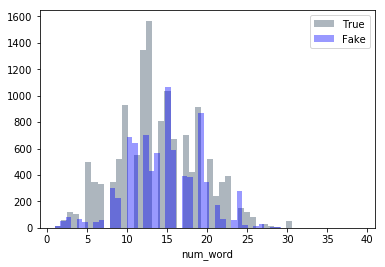

In [572]:
# number of words
fig, ax = plt.subplots()
data_test['num_word'] = data_test['words'].apply(lambda x: len(x))
sns.distplot(data_test['num_word'][data_test['label'] == '0'], color= "#34495e", label="True",  kde=False, ax=ax)
sns.distplot(data_test['num_word'][data_test['label'] == '1'] , color="blue", label="Fake",  kde=False, ax=ax)
ax.legend()
plt.show()

In [ ]:
from nltk.tag import pos_tag_sents

# Load tokenized tweets
tweets_tokens = twitter_samples.tokenized('positive_tweets.json')

# Tag tagged tweets
tweets_tagged = pos_tag_sents(tweets_tokens)

# Set accumulators
JJ_count = 0
NN_count = 0

# Loop through list of tweets
for tweet in tweets_tagged:
    for pair in tweet:
        tag = pair[1]
        if tag == 'JJ':
            JJ_count += 1
        elif tag == 'NN':
            NN_count += 1

# Print total numbers for each adjectives and nouns
print('Total number of adjectives = ', JJ_count)
print('Total number of nouns = ', NN_count)

### Part of Speech

In [242]:
data_test = data_test.copy()

In [243]:
from textblob import TextBlob
from collections import Counter

data_test['blobs'] = data_test['text'].apply(lambda x: TextBlob(x))

# Assign tags
data_test.loc[:,'tags'] = data_test.loc[:,'blobs'].apply(lambda x: Counter(tag for word,tag in x.tags))

# Normalize tag counts within tweets
data_test.loc[:,'tags'] = data_test.loc[:,'tags'].apply(lambda x: dict((POS, count/sum(x.values())) for POS, count\
                                                          in x.items()) )

# Normalize tag counts within topics


# Plotting
true_POS =  Counter({})
for tag in data_test.loc[:,'tags'][data_test['label'] == '0'].values.tolist():
    true_POS += tag
fake_POS = Counter({})
for tag in data_test.loc[:,'tags'][data_test['label'] == '1'].values.tolist():
    fake_POS += tag

def merge_dictionaries(dict1, dict2):
    merged_dict = {**dict1, **dict2}
    new_dict = dict((el,[0, 0]) for el in merged_dict.keys())
    for key in dict1:
        new_dict[key][0] = dict1[key]
    for key in dict2:
        new_dict[key][1] = dict2[key]
    return new_dict

total_POS = merge_dictionaries(true_POS, fake_POS)

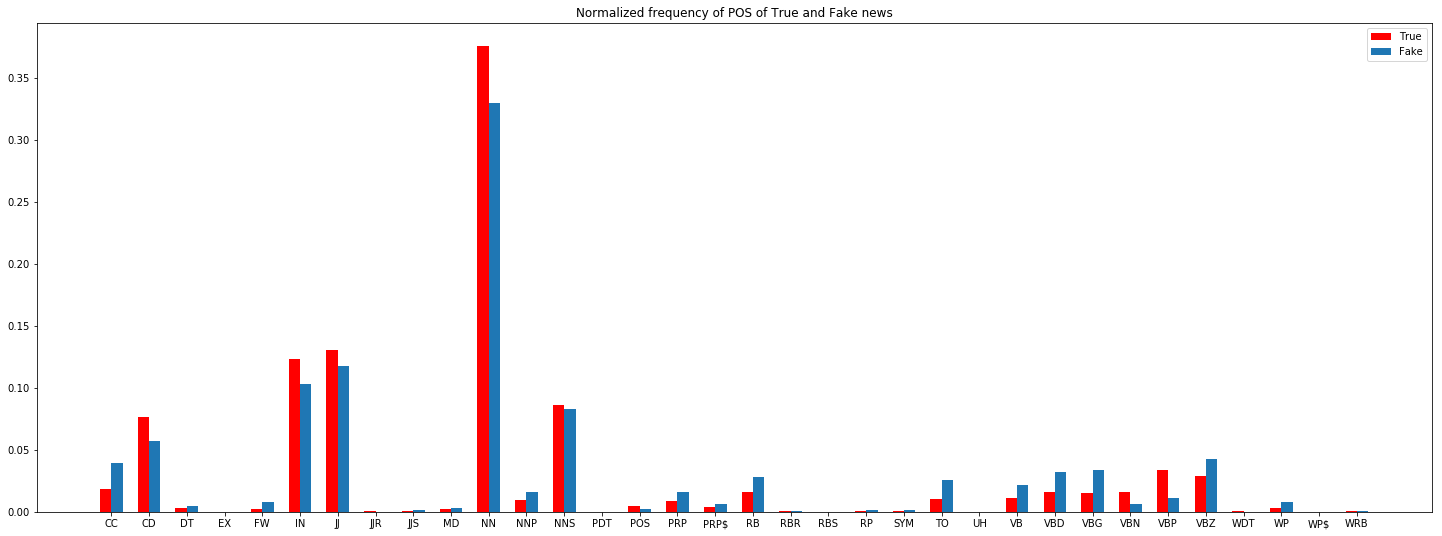

In [563]:
fig, ax = plt.subplots()
ind = np.arange(len(total_POS.keys()))
width = 0.3
p1 = ax.bar(ind, total_POS.loc[0].values/total_POS.sum(axis =1)[0], width, color ='red', label='True')
p2 = ax.bar(ind+width, total_POS.loc[1].values/total_POS.sum(axis =1)[1], width, label='Fake')
fig.set_figheight(9)
fig.set_figwidth(25)

ax.set_title('Normalized frequency of POS of True and Fake news')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(total_POS.keys())


ax.legend(['True', 'Fake'])
#ax.yaxis.set_units(inch)
ax.autoscale_view()

plt.show()

# POS acronym table can be found at: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

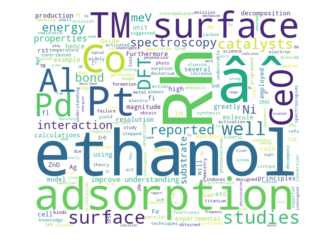

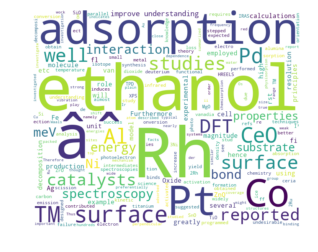

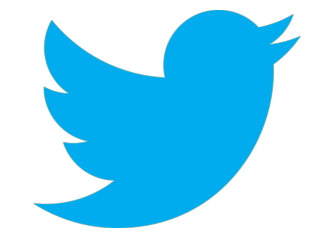

In [381]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


# Read the whole text.
text = open(path.join(d, 'readmee.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "twitter.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# Time Series Data Analysis